# TP1

Elaborado por: Alan Churichi

In [1]:
%load_ext lab_black

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado 
espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para 
validar el funcionamiento en el dominio espectral.

2. Comparar el resultado de hacer un filtrado por convolución con el mismo kernel.

In [2]:
def load_image(path, filename, grayscale=False):
    flags = {"flags": cv.IMREAD_GRAYSCALE} if grayscale else {}
    img = cv.imread(os.path.join(path, filename), **flags)
    if grayscale:
        return img
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)


def create_gauss_filter(h, w, k_size=15, sigma=5):
    canvas = np.zeros((h, w))
    kernel = cv.getGaussianKernel(k_size, sigma)
    kernel = kernel @ kernel.T
    start_y = h // 2 - kernel.shape[0] // 2
    start_x = w // 2 - kernel.shape[1] // 2
    canvas[
        start_y : start_y + kernel.shape[0],
        start_x : start_x + kernel.shape[1],
    ] = kernel
    return canvas, np.fft.fft2(canvas)

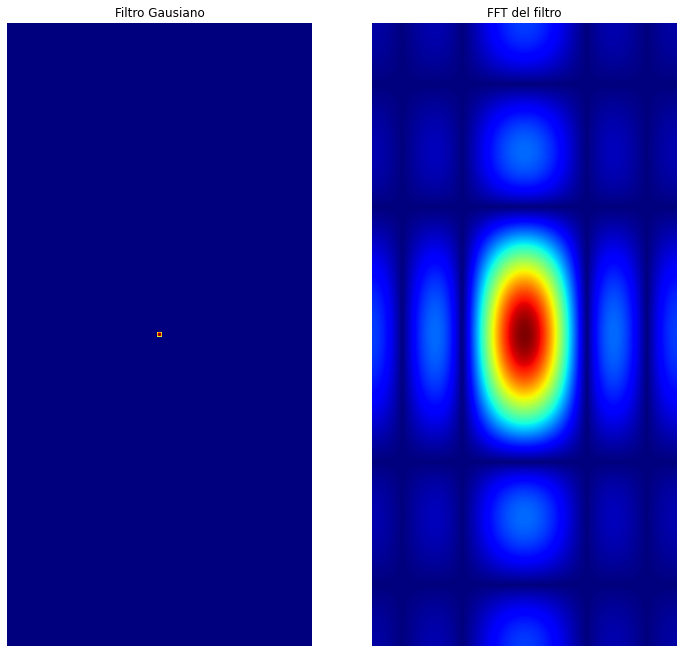

In [3]:
filter, filter_tf = create_gauss_filter(698, 341, k_size=5, sigma=5)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Filtro Gausiano")
plt.imshow(filter, cmap="jet")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("FFT del filtro")
plt.imshow(np.abs(np.fft.fftshift(filter_tf)), cmap="jet")

A continuación cargamos la imagen 'fft_alfa_pred.png' en escala de grises y le aplicamos filtros gausianos generados distintos tamaños de kernel y desviación estándar.

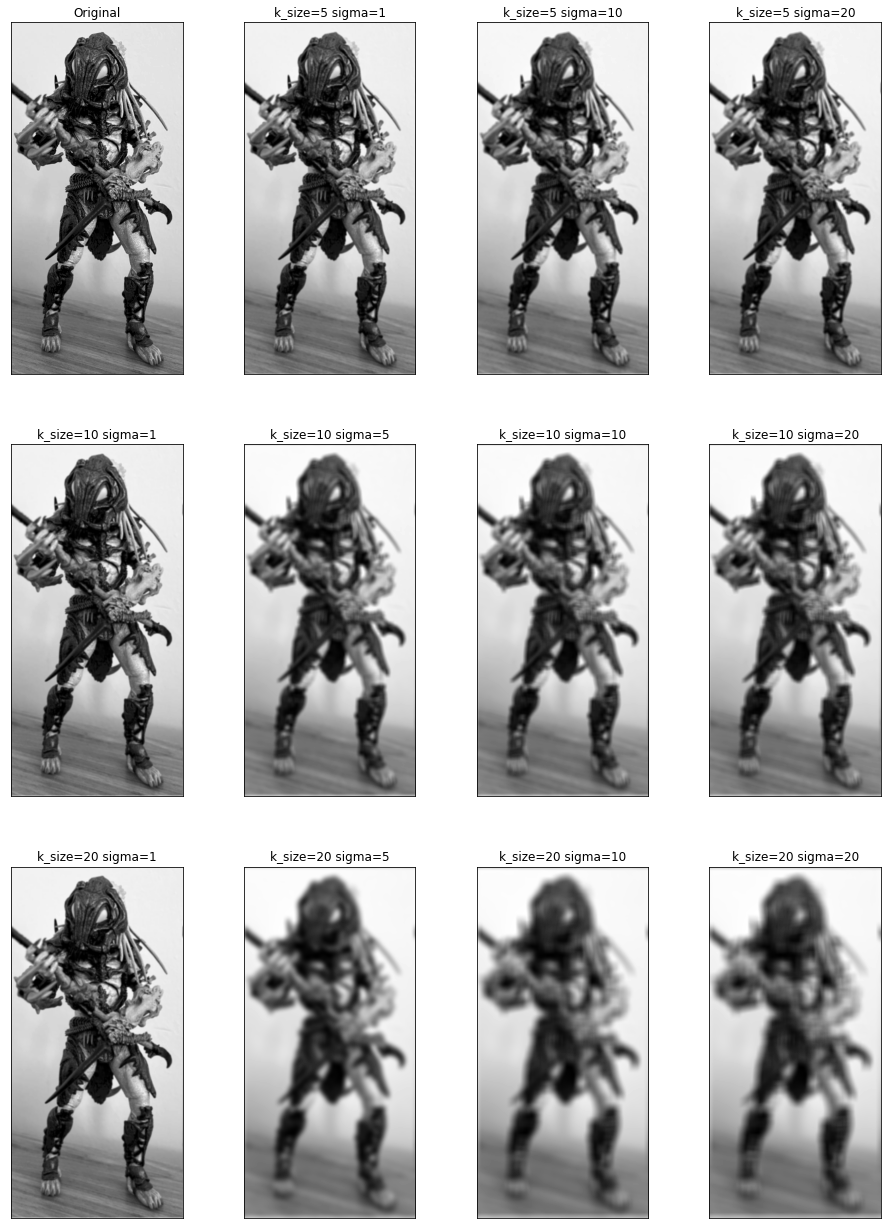

In [4]:
def filter_image(img, k_size, sigma):
    _, filter_tf = create_gauss_filter(
        img.shape[0],
        img.shape[1],
        k_size=k_size,
        sigma=sigma,
    )
    img_fft = np.fft.fft2(img)
    filtered = img_fft * filter_tf
    return np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))


def plot_examples(img, filter_func, combinations, size, figsize=(16, 22)):
    _, axes = plt.subplots(size[0], size[1], figsize=figsize)
    for i in range(size[0]):
        for j in range(size[1]):
            if i == 0 and j == 0:
                processed_img = img
                title = "Original"
            else:
                (k_size, sigma) = combinations[(size[0] + 1) * i + j]
                processed_img = filter_func(img, k_size, sigma)
                title = f"k_size={k_size} sigma={sigma}"
            axes[i][j].imshow(processed_img, cmap="gray")
            axes[i][j].title.set_text(title)
            axes[i][j].xaxis.set_visible(False)
            axes[i][j].yaxis.set_visible(False)


images_path = "/tf/notebooks/CEIA/computer-vision-1/tp2/assets"

img = load_image(images_path, "fft_alfa_pred.png", grayscale=True)

combinations = [
    (None, None),
    (5, 1),
    (5, 10),
    (5, 20),
    (10, 1),
    (10, 5),
    (10, 10),
    (10, 20),
    (20, 1),
    (20, 5),
    (20, 10),
    (20, 20),
]

plot_examples(img, filter_image, combinations, size=(3, 4), figsize=(16, 22))

Como podemos ver al aumentar los valores del kernel y el valor de sigma aumenta el efecto de blur.

Observarnado detenidamente los distintos casos nos damos cuenta de que para aumentar el efecto ambos valores deben ser elevados. Si uno toma valores altos y el otro no el efecto conseguido es menor. Tamién vemos que el tamaño de kernel influye mucho más en el efecto que el valor de desviación estándar.

Probamos realizar el filtrado mediante la convolución entre la imagen y el filtro.

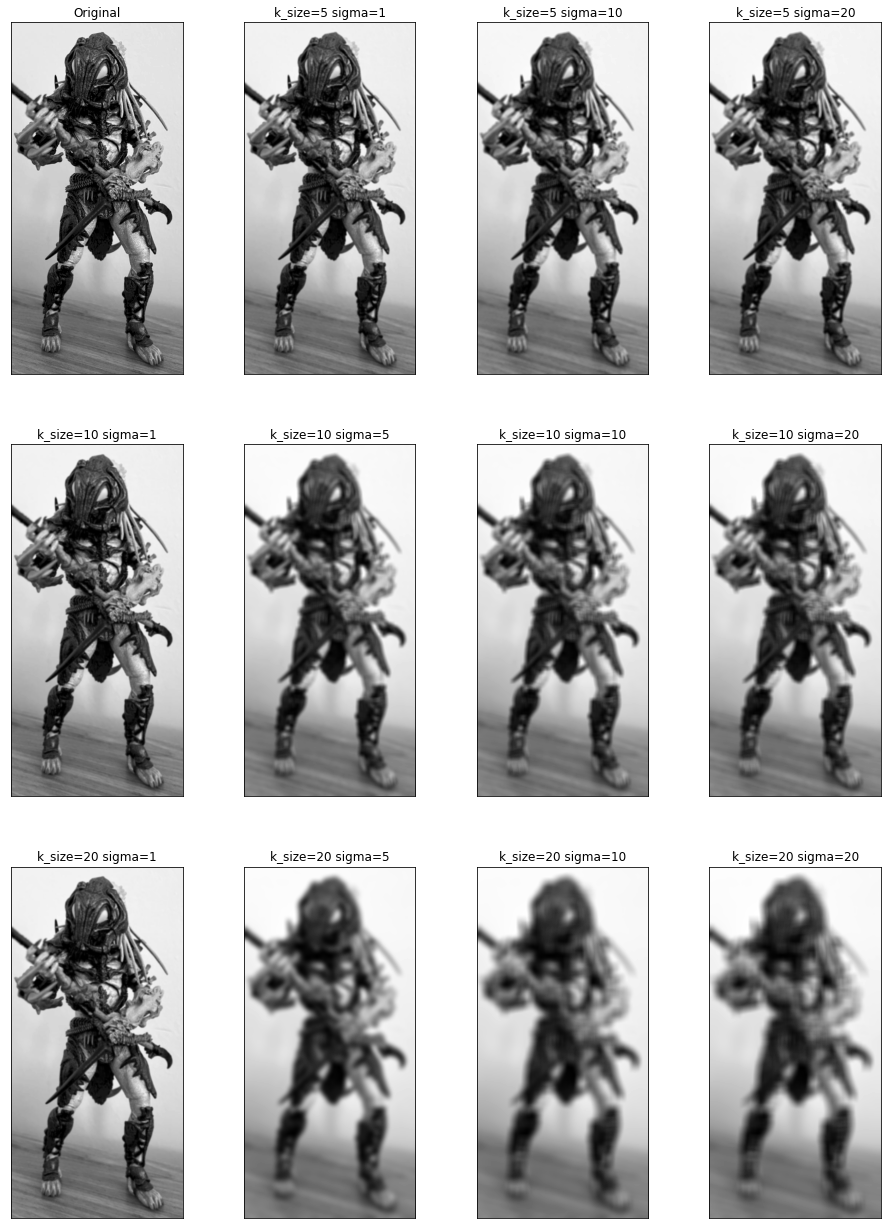

In [5]:
def filter_image_conv(img, k_size, sigma):
    kernel = cv.getGaussianKernel(k_size, sigma)
    kernel = kernel @ kernel.T
    return cv.filter2D(img, -1, kernel)


plot_examples(img, filter_image_conv, combinations, size=(3, 4), figsize=(16, 22))

Los resultados se ven iguales, lo cual tiene sentido ya que por propiedades de la Transformada de Fourier convolucionar en el dominio temporal es igual a multiplicar en el dominio frecuencial.

▪ Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con colores las direcciones de gradientes más representativos.

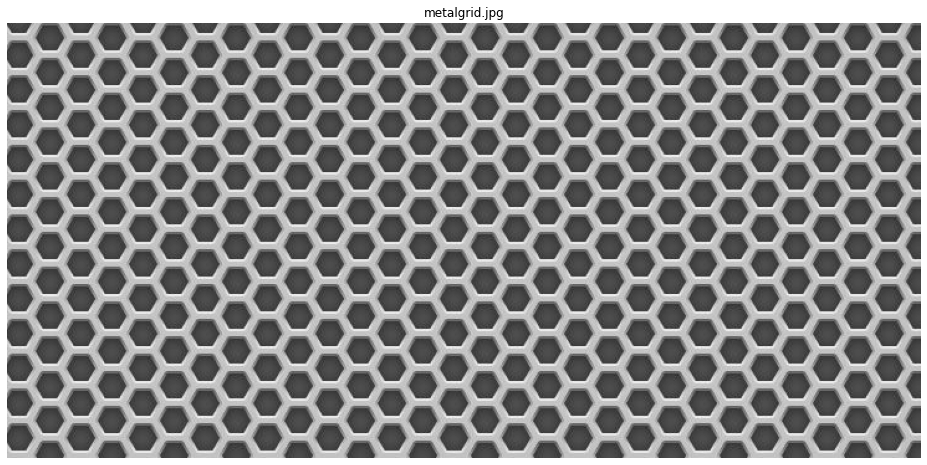

In [14]:
img = load_image(images_path, "metalgrid.jpg", grayscale=True)

plt.figure(figsize=(20, 8))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("metalgrid.jpg")
plt.show()